二维码又称QR Code，是一个近几年来流行的一种编码方式，使用黑白矩形图案表示二进制数据，被设备扫描后可获取其中所包含的信息。本教程将展示如何在原有黑白图片的基础上，给二维码添加一些色彩和动态效果，也可以说是给二维码换个皮肤。首先，简单了解一下二维码的基础知识。

### 二维码的基础知识

一个普通二维码的基本结构如下:

![](./static/images/qrcode_structure.png)

**定位图案**

定位图案，用于标记二维码的矩形大小。之所以三个而不是四个意思就是三个就可以标识一个矩形了。这个在转换的时候需要保留。

**功能性数据**

功能性数据用于存放一些格式化数据的，比如格式信息和版本信息。

**数据码和纠错码**

除了上述的那些地方，剩下的地方存放数据码和纠错码。

以上就是二维码的基本结构，下面就可以二维码图片的转换了。

### 二维码简单背景替换

In [1]:
# 导入需要使用的Python库
from PIL import Image, ImageEnhance
import matplotlib.pyplot as plt

In [2]:
# 读取二维码图片
qrcode = Image.open('./static/images/qrcode.png').convert("RGBA")

In [3]:
# 为方便处理，先将二维码转换为99x99的尺寸
src_size = (qrcode.size[0], qrcode.size[1])
qrcode = qrcode.resize((99, 99))

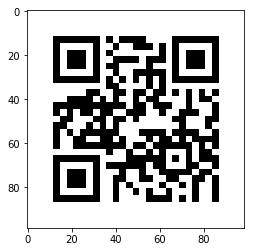

In [4]:
# 显示当前的二维码图片
plt.imshow(qrcode)
plt.show()

In [5]:
# 读取新的图片
bg = Image.open('./static/images/luffy.jpeg').convert("RGBA")

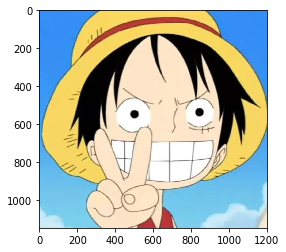

In [6]:
# 显示转换成为的新图片
plt.imshow(bg)
plt.show()

In [7]:
# 将新的图片转换为合适的尺寸
if bg.size[0] < bg.size[1]:
    bg = bg.resize((qrcode.size[0]-24, (qrcode.size[0]-24)*int(bg.size[1]/bg.size[0])))
else:
    bg = bg.resize(((qrcode.size[1]-24)*int(bg.size[0]/bg.size[1]), qrcode.size[1]-24)) 

In [8]:
'''
循环二维码图片中各个像素点
其中三个定位图案和有效数据不能替换
这里的坐标位置以本教程的二维码为例，如有不同，需要修改
'''
for i in range(qrcode.size[0]-24):
    for j in range(qrcode.size[1]-24):
        # 忽略左上角定位图案
        if i<24 and j<24: 
            continue
        # 忽略右上角定位图案
        elif i<24 and j>qrcode.size[1]-49:  
            continue
        # 忽略左下角定位图案
        elif i>qrcode.size[0]-49 and j<24: 
            continue
        elif i%3==1 and j%3==1:
            continue
        # 背景中透明的略不做处理
        elif bg.getpixel((i,j))[3]==0:  
            continue
        else:
            # 用新图片上的像素替换原有二维码上
            qrcode.putpixel((i+12,j+12), bg.getpixel((i,j)))

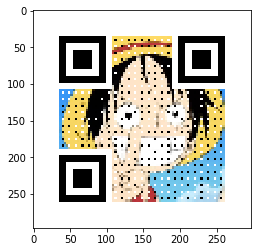

In [9]:
# 显示新的二维码图片
qrcode = qrcode.resize(src_size)
plt.imshow(qrcode)
plt.show()

简单的转换就完成了，最后展示下如何生成一个有动态效果的二位码。

### 动态二维码

步骤和上面类似，区别在于使用的是二维码加动图GIF。先将上面的过程封装为一个函数，内如如下:

In [10]:
def transfer(qrcode, bg):
    src_size = (qrcode.size[0], qrcode.size[1])
    qrcode = qrcode.resize((99, 99))
    if bg.size[0] < bg.size[1]:
        bg = bg.resize((qrcode.size[0]-24, (qrcode.size[0]-24)*int(bg.size[1]/bg.size[0])))
    else:
        bg = bg.resize(((qrcode.size[1]-24)*int(bg.size[0]/bg.size[1]), qrcode.size[1]-24)) 
        
    for i in range(qrcode.size[0]-24):
        for j in range(qrcode.size[1]-24):
            # 忽略左上角定位图案
            if i<24 and j<24: 
                continue
            # 忽略右上角定位图案
            elif i<24 and j>qrcode.size[1]-49:  
                continue
            # 忽略左下角定位图案
            elif i>qrcode.size[0]-49 and j<24: 
                continue
            elif i%3==1 and j%3==1:
                continue
            # 背景中透明的略不做处理
            elif bg.getpixel((i,j))[3]==0:  
                continue
            else:
                # 用新图片上的像素替换原有二维码上
                qrcode.putpixel((i+12,j+12), bg.getpixel((i,j)))
    qrcode = qrcode.resize(src_size)
    return qrcode

In [11]:
# 二维码图片
qrcode = Image.open('./static/images/qrcode.png').convert("RGBA")

Gif图如下:

![](./static/images/penguin.gif)

In [12]:
# 读取Gif图片
gif = Image.open('./static/images/penguin.gif')
duration = gif.info.get('duration', 0)
bg_frames = []

# 循环Gif图片中的所有帧数
try:
    i= 0
    while 1:
        gif.seek(i)
        gif_copy = gif.copy()
        if i == 0: 
            palette = gif_copy.getpalette()
        else:
            gif_copy.putpalette(palette)
        bg_frames.append(gif_copy.convert("RGBA"))
        i += 1
except EOFError:
    pass

In [13]:
# 循环图片列表，并将结果存到一个新的数组中
import numpy

frames = []
for i in bg_frames:
    frames.append(numpy.array(transfer(qrcode, i)))

In [14]:
# 合并图片组到新的gif文件中
import imageio

imageio.mimsave('qrcode.gif', frames)

结果如下：

![](qrcode.gif)